In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_path='/content/drive/MyDrive/cat_dog/archive (1).zip'
exact_all='/content/drive/MyDrive/cat_dog'
zef_f = zipfile.ZipFile(zip_path,'r')
zef_f.extractall(exact_all)

In [2]:
df_path='/content/drive/MyDrive/cat_dog/PetImages'


In [3]:

cat_dir = '/content/drive/MyDrive/cat_dog/PetImages/Cat'
dog_dir = '/content/drive/MyDrive/cat_dog/PetImages/Dog'


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import keras
import cv2
from tqdm import tqdm

/content/drive/MyDrive/cat_dog/PetImages/Cat/9099.jpg
9099.jpg => (500, 381, 3)


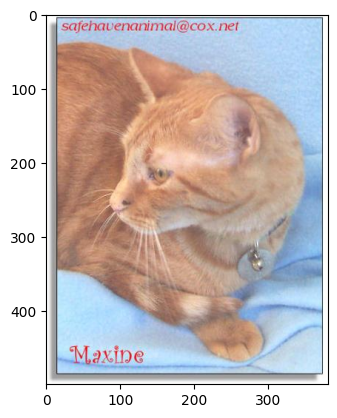

/content/drive/MyDrive/cat_dog/PetImages/Cat/91.jpg
91.jpg => (375, 500, 3)


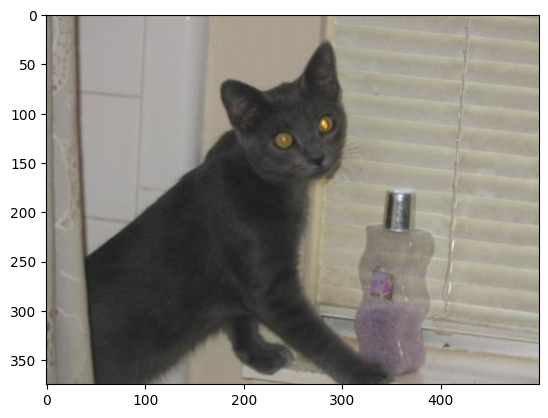

/content/drive/MyDrive/cat_dog/PetImages/Cat/910.jpg
910.jpg => (315, 360, 3)


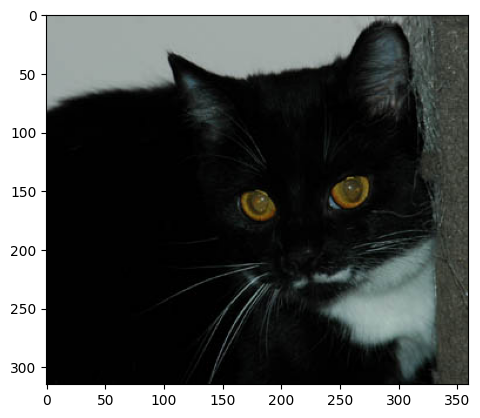

/content/drive/MyDrive/cat_dog/PetImages/Cat/9100.jpg
9100.jpg => (210, 280, 3)


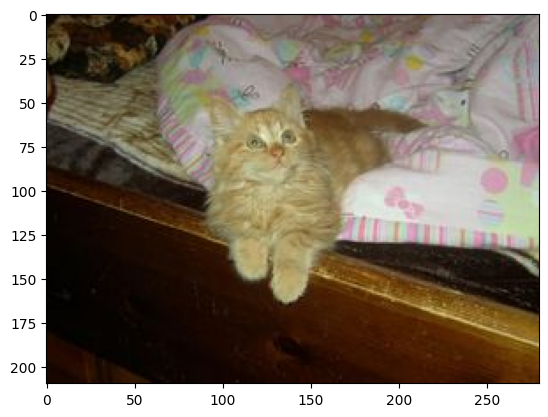

/content/drive/MyDrive/cat_dog/PetImages/Cat/9101.jpg
9101.jpg => (315, 243, 3)


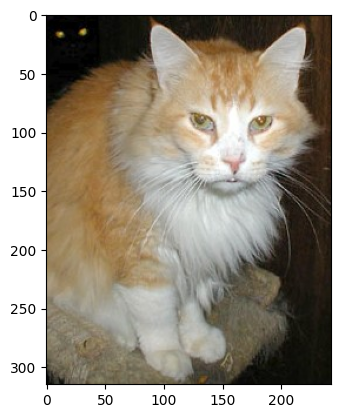

/content/drive/MyDrive/cat_dog/PetImages/Cat/9102.jpg
9102.jpg => (375, 500, 3)


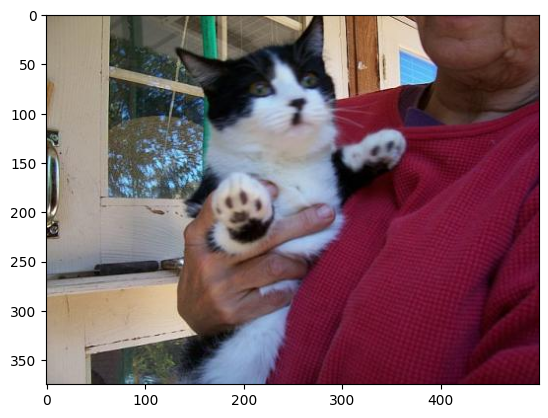

/content/drive/MyDrive/cat_dog/PetImages/Cat/9103.jpg
9103.jpg => (500, 333, 3)


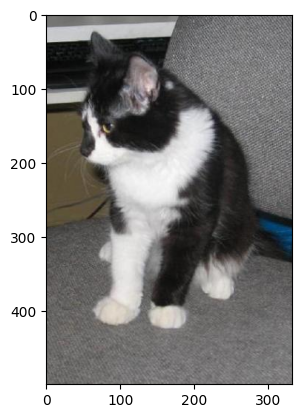

/content/drive/MyDrive/cat_dog/PetImages/Cat/9104.jpg
9104.jpg => (424, 406, 3)


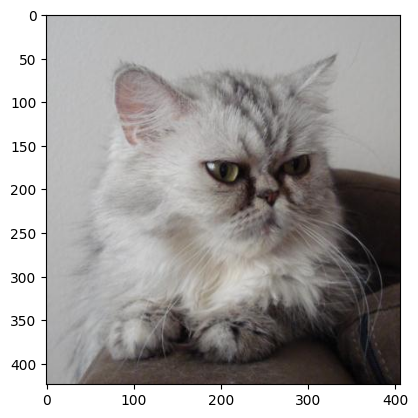

/content/drive/MyDrive/cat_dog/PetImages/Cat/9105.jpg
9105.jpg => (373, 500, 3)


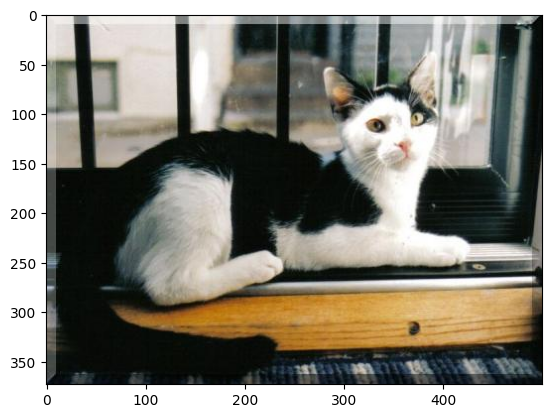

/content/drive/MyDrive/cat_dog/PetImages/Cat/9106.jpg
9106.jpg => (188, 250, 3)


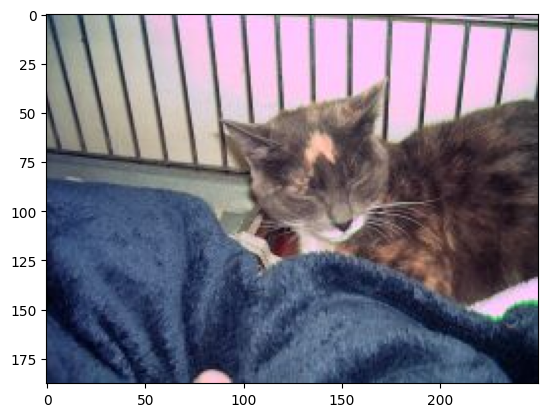

In [5]:
path_os = os.listdir(cat_dir)

for i in path_os[0:10]:
    joint =os.path.join(cat_dir, i)
    print(joint)
    am = mpimg.imread(joint)
    print(i, "=>", am.shape)
    plt.imshow(am)
    plt.show()

In [6]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.20,  # train = 80%, val = 20%
    dtype='float32'
)

# -----------------------------
# 2. TRAIN DATA
# -----------------------------
train_data = datagen.flow_from_directory(
    df_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='training'
)

# -----------------------------
# 3. VALIDATION DATA (NO extra datagen needed)
# -----------------------------
val_data = datagen.flow_from_directory(
    df_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [7]:
train_data.class_indices.values()

dict_values([0, 1])

In [8]:
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential

In [9]:

model = Sequential([
    Conv2D(98, (3, 3), padding='same', activation='relu', input_shape=(180, 180, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(34, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 98)   │         2,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 98)   │           392 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 98)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        56,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 34)     │        19,618 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 45, 45, 34)     │           136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 34)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,106,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186,795 (8.34 MB)

 Trainable params: 2,186,147 (8.34 MB)

 Non-trainable params: 648 (2.53 KB)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = val_data.samples // val_data.batch_size

model_history = model.fit(
    train_data,
    epochs=2,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data,
    validation_steps=validation_steps
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2


In [ ]:
accuracy = model.evaluate(val_data)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.5960 - loss: 0.6870
Test Accuracy: 60.22%


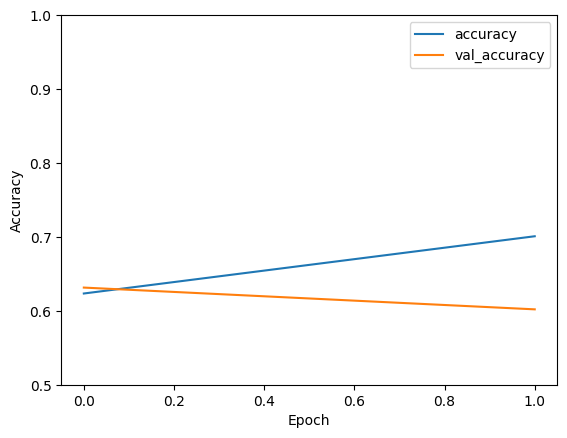

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

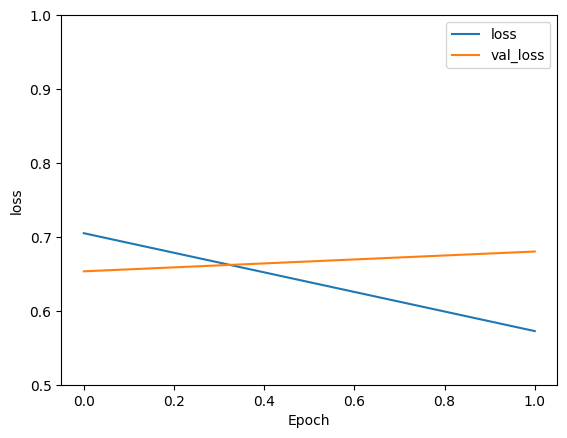

In [ ]:
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt # Make sure plt is imported

def image_path(path):
    # Load image
    load_m = image.load_img(path, target_size=(180, 180))

    # Convert to array
    img_array = image.img_to_array(load_m) / 255.0

    # Expand dimensions for model input
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)

    # For binary classification
    if pred[0][0] > 0.5:
        predict_class = list(train_data.class_indices.keys())[1]  # class '1'
    else:
        predict_class = list(train_data.class_indices.keys())[0]  # class '0'

    # Display the image and prediction
    img = image.load_img(path) # Load image again for displaying
    plt.imshow(img) # Corrected from plt.im
    plt.axis('off')
    plt.title(f'Prediction: {predict_class }')
    plt.show()
    return predict_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


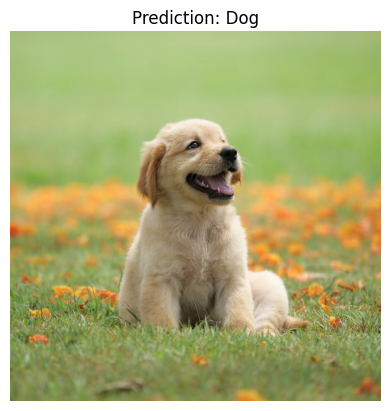

'Dog'

In [ ]:
image_path('/content/dog-puppy-on-garden-royalty-free-image-1586966191.avif')